# HW2


Before submitting your **HTpy-HW2.ipynb** file, perform the following
* `Kernel>Restart & Run All`
* Make sure that there are no errors

The following includes problems that need coding and others that only need to perform simple operations (python as a calculator).

In [1]:
from Libraries import thermodynamics as thermo
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts

## 1 Insulation

This problem is an expansion of PB 3 in `HTpy-HW2.ipynb`

Assuming that the outer surface temperature of the pipe is $150^\circ C$, find an insulation that works (i.e. an insulation that will not melt, for which you can find the price and thermal conductivity online). Derive the necessary equations that allow for determination of the different costs as a function of the thickness. Generate a plot for at least 3 different thicknesses.

Hint: Derive the heat loss for a variable thickness of insulation, then apply this formula for a range of thicknesses. Compare savings of gas vs cost of insulation.

### Solution
Assumptions:
<ul>
    <li>Heat transfer is steady and 1D</li>
</ul>
#define all variables
d=.1
r_inner=.05
r_insulation=[0,0.0127,0.0254,0.0381,0.0508]
r_outer=[r_inner+x for x in r_insulation]
print(r_outer)

[[    0.         10188.28991351]
 [  455.           173.6076376 ]
 [  518.            96.36573462]
 [  720.16          70.05026641]
 [ 1034.32          56.66042506]]


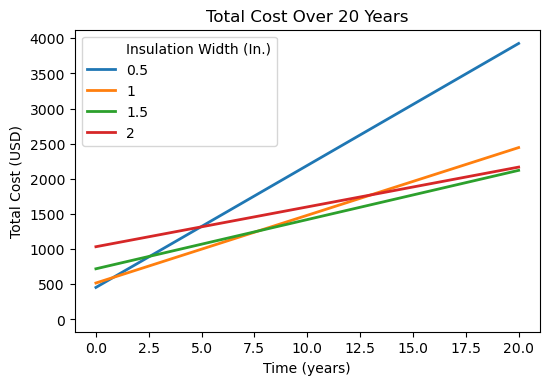

In [2]:
#import math so we can use log function
import math
#define all variables
d = .1
L = 25
r_inner = .05;
r_insulation = [0,0.0127,0.0254,0.0381,0.0508]
r_outer = [r_inner+x for x in r_insulation]
pi = 3.1415;
A = [2*pi*L*x for x in r_outer]
emissivity = 0.8
h = 10
T_inf = 25+273.15
T_sur = 25+273.15
sbc = 5.67*(10**-8)
k = .056
T_pipe = 150+273.15
#
from Libraries import HT_thermal_resistance as res
Rth = [];
Rth.append(res.Resistance("$R'_{cond,2}$",'W/m'))
Rth.append(res.Resistance("$R'_{conv,o}$",'W/m'))
Rth.append(res.Resistance("$R'_{rad,o}$",'W/m'))


#define the thermal resistances
R_rad=[1/(emissivity*sbc*(T_sur+T_inf)*(T_sur**2+T_inf**2)*x) for x in A]
R_conv=[1/(h*x) for x in A]
R_cond=[math.log(x/r_inner)/2*pi*k*L for x in r_outer]
import numpy as np
vector1 = np.array(R_rad)
vector2 = np.array(R_conv)
vector3 = np.array(R_cond)

R_eq =np.reciprocal(np.reciprocal(vector1)+np.reciprocal(vector2)) + vector3
q=(T_inf-T_pipe)/R_eq

insulation_cost=[0,16.25,18.50,25.72,36.94]

costofheat=-0.02*10**-6
efficiency=0.9
heatloss_cost=q*costofheat/efficiency
heatloss_cost_per_year=heatloss_cost*31536000
total_insulation_cost=[28*x for x in insulation_cost]

yearly=np.array(heatloss_cost_per_year)
initial=np.array(total_insulation_cost)
pairs=np.vstack((initial,yearly)).T
print(pairs)


#graph
time = np.linspace(0,20,5)

#series
legend_title = (heatloss_cost_per_year*time)+(total_insulation_cost[0])+20
width1 = (pairs[1][0]+pairs[1][1]*time)
width2 = (pairs[2][0]+pairs[2][1]*time)
width3 = (pairs[3][0]+pairs[3][1]*time)
width4 = (pairs[4][0]+pairs[4][1]*time)
    
plt.figure(figsize=(6,4), dpi=100)

#plot series
plt.plot(time,legend_title,color='white', label='Insulation Width (In.)')
plt.plot(time,width1, lw=2, label='0.5')
plt.plot(time,width2, lw=2, label='1')
plt.plot(time,width3, lw=2, label='1.5')
plt.plot(time,width4, lw=2, label='2')

plt.title('Total Cost Over 20 Years')
plt.xlabel('Time (years)')
plt.ylabel('Total Cost (USD)')

plt.legend()
plt.show()

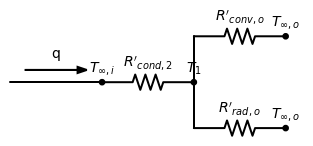

In [3]:
import schemdraw as schem
import schemdraw.elements as e

# Create a new circuit
d = schem.Drawing()

L1=d.add( e.LINE, d = 'right')
d.labelI(L1,'q')
#create a dot for inside temperature
d.add( e.DOT, label='$T_{\infty,i}$')
#create the first resistance
R0 = d.add( e.RES, d='right', label=Rth[0].name )
d.add( e.DOT, label='$T_1$')
d.push()
d.add(e.LINE, l = 1.5, d = 'up')
R3 = d.add( e.RES, d='right', label=Rth[1].name )
d.add( e.DOT, label='$T_{\infty,o}$')
d.pop()
d.add(e.LINE, d='down', l = 1.5)
R4 = d.add( e.RES, d='right', label=Rth[2].name )
d.add( e.DOT, label='$T_{\infty,o}$')
#L1 = d.add(e.LINE, toplabel = "$q'$", endpts = [[-0.25, 0], [-2.25, 0]])
#d.labelI(L1, arrowofst = 0)
d.draw()


## 2 Window

Set up equations and apply realistic numerical values to them to discuss heat losses of a single pane window, a single pane window with storm window and a double paned window with air trapped at a vacuum of $10^{-3} \mathrm{torr}$ in a gap of $5\mathrm{mm}$. Do not consider the effects of radiation for any of the window.

<img src="ThermalCondAir.png" alt="my awesome sketch" width=100% >

### Solution
Assumptions:
<ul>
    <li>Heat transfer is steady and 1D</li>
    <li>No radiation</li>
    <li>Air in storm window is stagnant</li>
</ul>

DISCUSSION: As we can see, the heat flux through the single pane window was by far the largest. This is unsuprising, as the heat has the fewest barriers to transfer through on its way outside. The storm window had a very small rate of heat transfer because the air inside was very stagnant, meaning that there was no convection, and the heat had to be conducted through the air. The heat flux through the window with the vacuum between the panes had a somewhat comparable rate of heat transfer to the storm window. However, the gap between the panes of the vacuumed window was about 5% as large as it was for the storm window, meaning that the vacuum caused the interpane spacing to be less conductive. 

In [4]:
h = 20                  #Convection coeff, (free convection outdoors), in W/(m^2 K)
k_s = .026              #Conduction coeff for stagnant air at 1 atm, T = ~ 16-18 C, in W/(m K)
k_v = .0015             #Convection coeff for air at 10^-3 torr (approx.)
L_s = .1                #pane spacing for storm window, in meters
L_v = .005              #pane spacing for vacuum window, in meters 
T_w = thermo.C2K(18)    #window temperature, in kelvin
T_inf = thermo.C2K(5)   #outdoor temperature in kelvin

#single pane window 
q_sp = h*(T_inf - T_w)  #all results in W/m^2

#storm window
q_sw = (1/(L_s/k_s + 1/h))*(T_inf - T_w)

#vacuum window
q_vw = (1/(L_v/k_v + 1/h))*(T_inf - T_w)

print('The heat flux through a single pane window is:', q_sp, 'W/M^2   \n')
print('The heat flux through a storm window is:', q_sw, 'W/M^2   \n')
print('The heat flux through a vacuum window is:', q_vw, 'W/M^2   \n')

The heat flux through a single pane window is: -260.0 W/M^2   

The heat flux through a storm window is: -3.336623889437315 W/M^2   

The heat flux through a vacuum window is: -3.8423645320197046 W/M^2   

